In [246]:
import numpy as np
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon
from sklearn.cluster import KMeans

def coord_extend(coords, feet_expand):
    
    def latConvert(n):
        degrees = n/305775
        return degrees
    
    def coordinate_get(x):
        return [(i[0], i[1]) for i in x]

    get = coordinate_get(coords)
    
    feet_expand = latConvert(feet_expand)

    obj = LinearRing(coords)

    """----------- new code for a new offset--------"""
    offset_1 = obj.parallel_offset(feet_expand, 'left', join_style=2, mitre_limit=10.0)
    offset_2 = obj.parallel_offset(feet_expand, 'right', join_style=2, mitre_limit=10.0)
    
    if offset_1.length > offset_2.length:
        orient = 'left'
    else:
        orient = 'right'
        
    """---------------------"""
    
    
    offset = obj.parallel_offset(feet_expand, orient, join_style=2, mitre_limit=(10*5))
#     poly = Polygon(offset)

#     new_coords = list(poly.exterior.coords)
    new_coords = list(offset.coords)
    

    def coordinate_give(x):
        return [[i[0], i[1]] for i in x]
    give = coordinate_give(new_coords)
    
    return(give)

In [215]:
import json

json_data = open('./json_files/100zones.json').read()

zones = json.loads(json_data)

# zones

for x in (range(0, len(zones['data']))):
    print(zones['data'][x]['name'])
#     print(zones['data'][x]['geojson']['geometry']['coordinates'][0])
    coords = zones['data'][x]['geojson']['geometry']['coordinates'][0]
#     zones = list(map(int, zones))
    print(coords, "\n *****Extended******")
    print(coord_extend(coords, 35))


SPRH:127
[[-75.36867753491049, 40.05246405516186], [-75.36867481711835, 40.05251681263829], [-75.36860663267346, 40.05252971909695], [-75.3685905349162, 40.05247970647764], [-75.36867753491049, 40.05246405516186]] 
 *****Extended******
[[-75.36879184658126, 40.052469943907525], [-75.36878912878912, 40.05252270138395], [-75.36878805206608, 40.05253353633439], [-75.36878595070615, 40.052544219955955], [-75.36878284372403, 40.05255465557504], [-75.36877875923412, 40.052564748762116], [-75.368773734196, 40.05257440818628], [-75.36876781408007, 40.05258354644163], [-75.36876105245612, 40.05259208083821], [-75.3687535105085, 40.05259993415022], [-75.36874525648257, 40.052607035314864], [-75.36873636506708, 40.05261332007534], [-75.36872691671843, 40.05261873156229], [-75.36871699693252, 40.05262322080844], [-75.36870669547122, 40.052626747191624], [-75.36869610555006, 40.05262927880242], [-75.36862792110517, 40.052642185261085], [-75.36861699375042, 40.052643712445374], [-75.36860597012281, 

[[-75.36794015255, 40.0538897496598], [-75.36781260742012, 40.0539176434355], [-75.36780152168332, 40.053919502882714], [-75.36779030701818, 40.05392026602767], [-75.36777907157638, 40.053919925510776], [-75.36776792370993, 40.05391848461589], [-75.36775697092632, 40.05391595723869], [-75.36774631885169, 40.05391236775261], [-75.3677360702122, 40.05390775077383], [-75.3677263238434, 40.05390215082745], [-75.36771717373703, 40.05389562191806], [-75.36770870813463, 40.053888227008976], [-75.36770100867653, 40.053880037415006], [-75.36769414961455, 40.05387113211473], [-75.3676881970959, 40.05386159698882], [-75.36768320852534, 40.053851523991845], [-75.36766043261458, 40.05379922316012], [-75.36765638951348, 40.053788502645055], [-75.36765343842832, 40.0537774316376], [-75.36765160892801, 40.05376612106563], [-75.36765091934353, 40.05375468425738], [-75.36765137658432, 40.053743235805925], [-75.36765297606895, 40.05373189042102], [-75.36765570177113, 40.05372076177971], [-75.367659526380

[[-75.36879226592563, 40.0524262514264], [-75.36880863912081, 40.05247430134153], [-75.368811676725, 40.05248484672799], [-75.36881369049202, 40.05249563454321], [-75.3688146619113, 40.05250656562548], [-75.36881458205356, 40.05251753949615], [-75.36881345165284, 40.0525284552833], [-75.3688112810998, 40.05253921264888], [-75.36880809034619, 40.052549712711084], [-75.36880390872145, 40.05255985895321], [-75.3687987746631, 40.0525695581109], [-75.3687927353635, 40.052578721029384], [-75.36878584633594, 40.05258726348301], [-75.36877817090443, 40.05259510694947], [-75.36876977962163, 40.05260217933151], [-75.3687607496203, 40.05260841561973], [-75.3687511639043, 40.0526137584901], [-75.36874111058566, 40.05261815883088], [-75.36873068207457, 40.05262157619412], [-75.36871997423005, 40.05262397916736], [-75.36864890018254, 40.0526363844266], [-75.36863775911576, 40.05263777007938], [-75.36862653589357, 40.05263805763195], [-75.36861533848659, 40.05263724431798], [-75.36860427461707, 40.05

[[-75.3674246794287, 40.0537426912895], [-75.36744775540431, 40.05379097092455], [-75.36745212168724, 40.05380140117542], [-75.36745543756875, 40.0538122113322], [-75.36745767069074, 40.053823295903726], [-75.36745879926124, 40.053834546720964], [-75.36745881226706, 40.05384585399254], [-75.36745770958127, 40.0538571073762], [-75.3674555019645, 40.05386819705555], [-75.36745221095978, 40.05387901481168], [-75.36744786868248, 40.053889455079286], [-75.3674425175068, 40.053899415976765], [-75.36743620965233, 40.05390880030048], [-75.36742900667439, 40.053917516473305], [-75.36742097886341, 40.05392547943825], [-75.36741220455897, 40.05393261148854], [-75.36740276938532, 40.05393884302591], [-75.36739276541581, 40.05394411323976], [-75.36738229027443, 40.05394837070058], [-75.36737144618306, 40.053951573861845], [-75.36732529423176, 40.05396276060541], [-75.36731407097189, 40.053964894380165], [-75.36730269091103, 40.053965898756665], [-75.36729126741223, 40.05396576372976], [-75.36727991

[[-75.36886750809201, 40.05034778215991], [-75.36899912058446, 40.050291596597724], [-75.36900985177051, 40.05028763686716], [-75.36902092458048, 40.05028476794752], [-75.36903222843881, 40.05028301848846], [-75.3690436504627, 40.050282405960466], [-75.3690550765893, 40.050282936480386], [-75.36906639271477, 40.050284604750324], [-75.3690774858338, 40.05028739411057], [-75.36908824516804, 40.050291276705956], [-75.36909856327242, 40.05029621376403], [-75.36910833710806, 40.05030215598224], [-75.36911746907127, 40.050309044020274], [-75.36912586796828, 40.05031680909268], [-75.36913344992583, 40.05032537365572], [-75.3691840701201, 40.05038866313419], [-75.36919064078833, 40.05039775883942], [-75.36919628931045, 40.05040745418533], [-75.36920096140554, 40.05041765600195], [-75.36920461217584, 40.05042826625222], [-75.3692072065383, 40.05043918297415], [-75.36920871956175, 40.05045030126065], [-75.36920913670639, 40.0504615142676], [-75.36920845396352, 40.05047271424068], [-75.3692066778

[[-75.37009091265702, 40.05011728997864], [-75.37057175997965, 40.050212122573534], [-75.37058245460919, 40.050214772263885], [-75.37059284493496, 40.05021843792759], [-75.37060283468468, 40.05022308560019], [-75.37061233129762, 40.050228672218346], [-75.37062124678228, 40.05023514601888], [-75.37062949853161, 40.05024244701833], [-75.37063701008846, 40.05025050756879], [-75.37064371185397, 40.050259252984674], [-75.37064954173249, 40.050268602234716], [-75.37065444570686, 40.05027846869281], [-75.37065837833897, 40.0502887609406], [-75.37066130319076, 40.05029938361456], [-75.3706631931618, 40.05031023828956], [-75.37066403074044, 40.05032122439087], [-75.37066380816604, 40.05033224012601], [-75.37066252750085, 40.05034318342792], [-75.37066020061101, 40.05035395290068], [-75.37065684905645, 40.050364448759005], [-75.37057285825821, 40.05058947472798], [-75.37056849070174, 40.050599645634406], [-75.37056316115442, 40.05060934711946], [-75.37055691945595, 40.05061848845893], [-75.37054

# Unit Test

In [216]:
from shapely.geometry import LineString, LinearRing, mapping

def clockwise(shape):

        shape = np.array(shape)

        sorted_shapeX = sorted(shape, key=lambda k: [k[0]])

        first = sorted_shapeX[0]
        last = sorted_shapeX[-1]

        """-----------------"""
        kmeans = KMeans(n_clusters=1)
        kmeans = kmeans.fit(shape)
        centroid = kmeans.cluster_centers_
        midx = centroid[0][0]
        """---------------"""
        # print midx
        westside = []
        eastside = []

        for x in sorted_shapeX:
            if x[0] <= midx:
                westside.append(x[0:2])
            if x[0] > midx:
                eastside.append(x[0:2])

        sorted_westside = sorted(westside, key=lambda k: [k[1]])
        sorted_eastside = sorted(eastside, key=lambda k: [k[1]], reverse=True)

        clock = sorted_westside + sorted_eastside

        # first = clock[0]
        # second = clock[1]
        #
        # clock.extend([first, second])

        return [(i[0], i[1]) for i in clock]
    
    
def plot_coords(ax, x, y, color='#999999', zorder=1):
    ax.plot(x, y, 'o', color=color, zorder=zorder)

def plot_line(ax, ob,):
    parts = hasattr(ob, 'geoms') and ob or [ob]
    for part in parts:
        x, y = part.xy
        ax.plot(x, y, linewidth=1, solid_capstyle='round', zorder=1)

def set_limits(ax, x_range, y_range):
    ax.set_xlim(*x_range)
    ax.set_ylim(*y_range)
    ax.set_aspect(1)

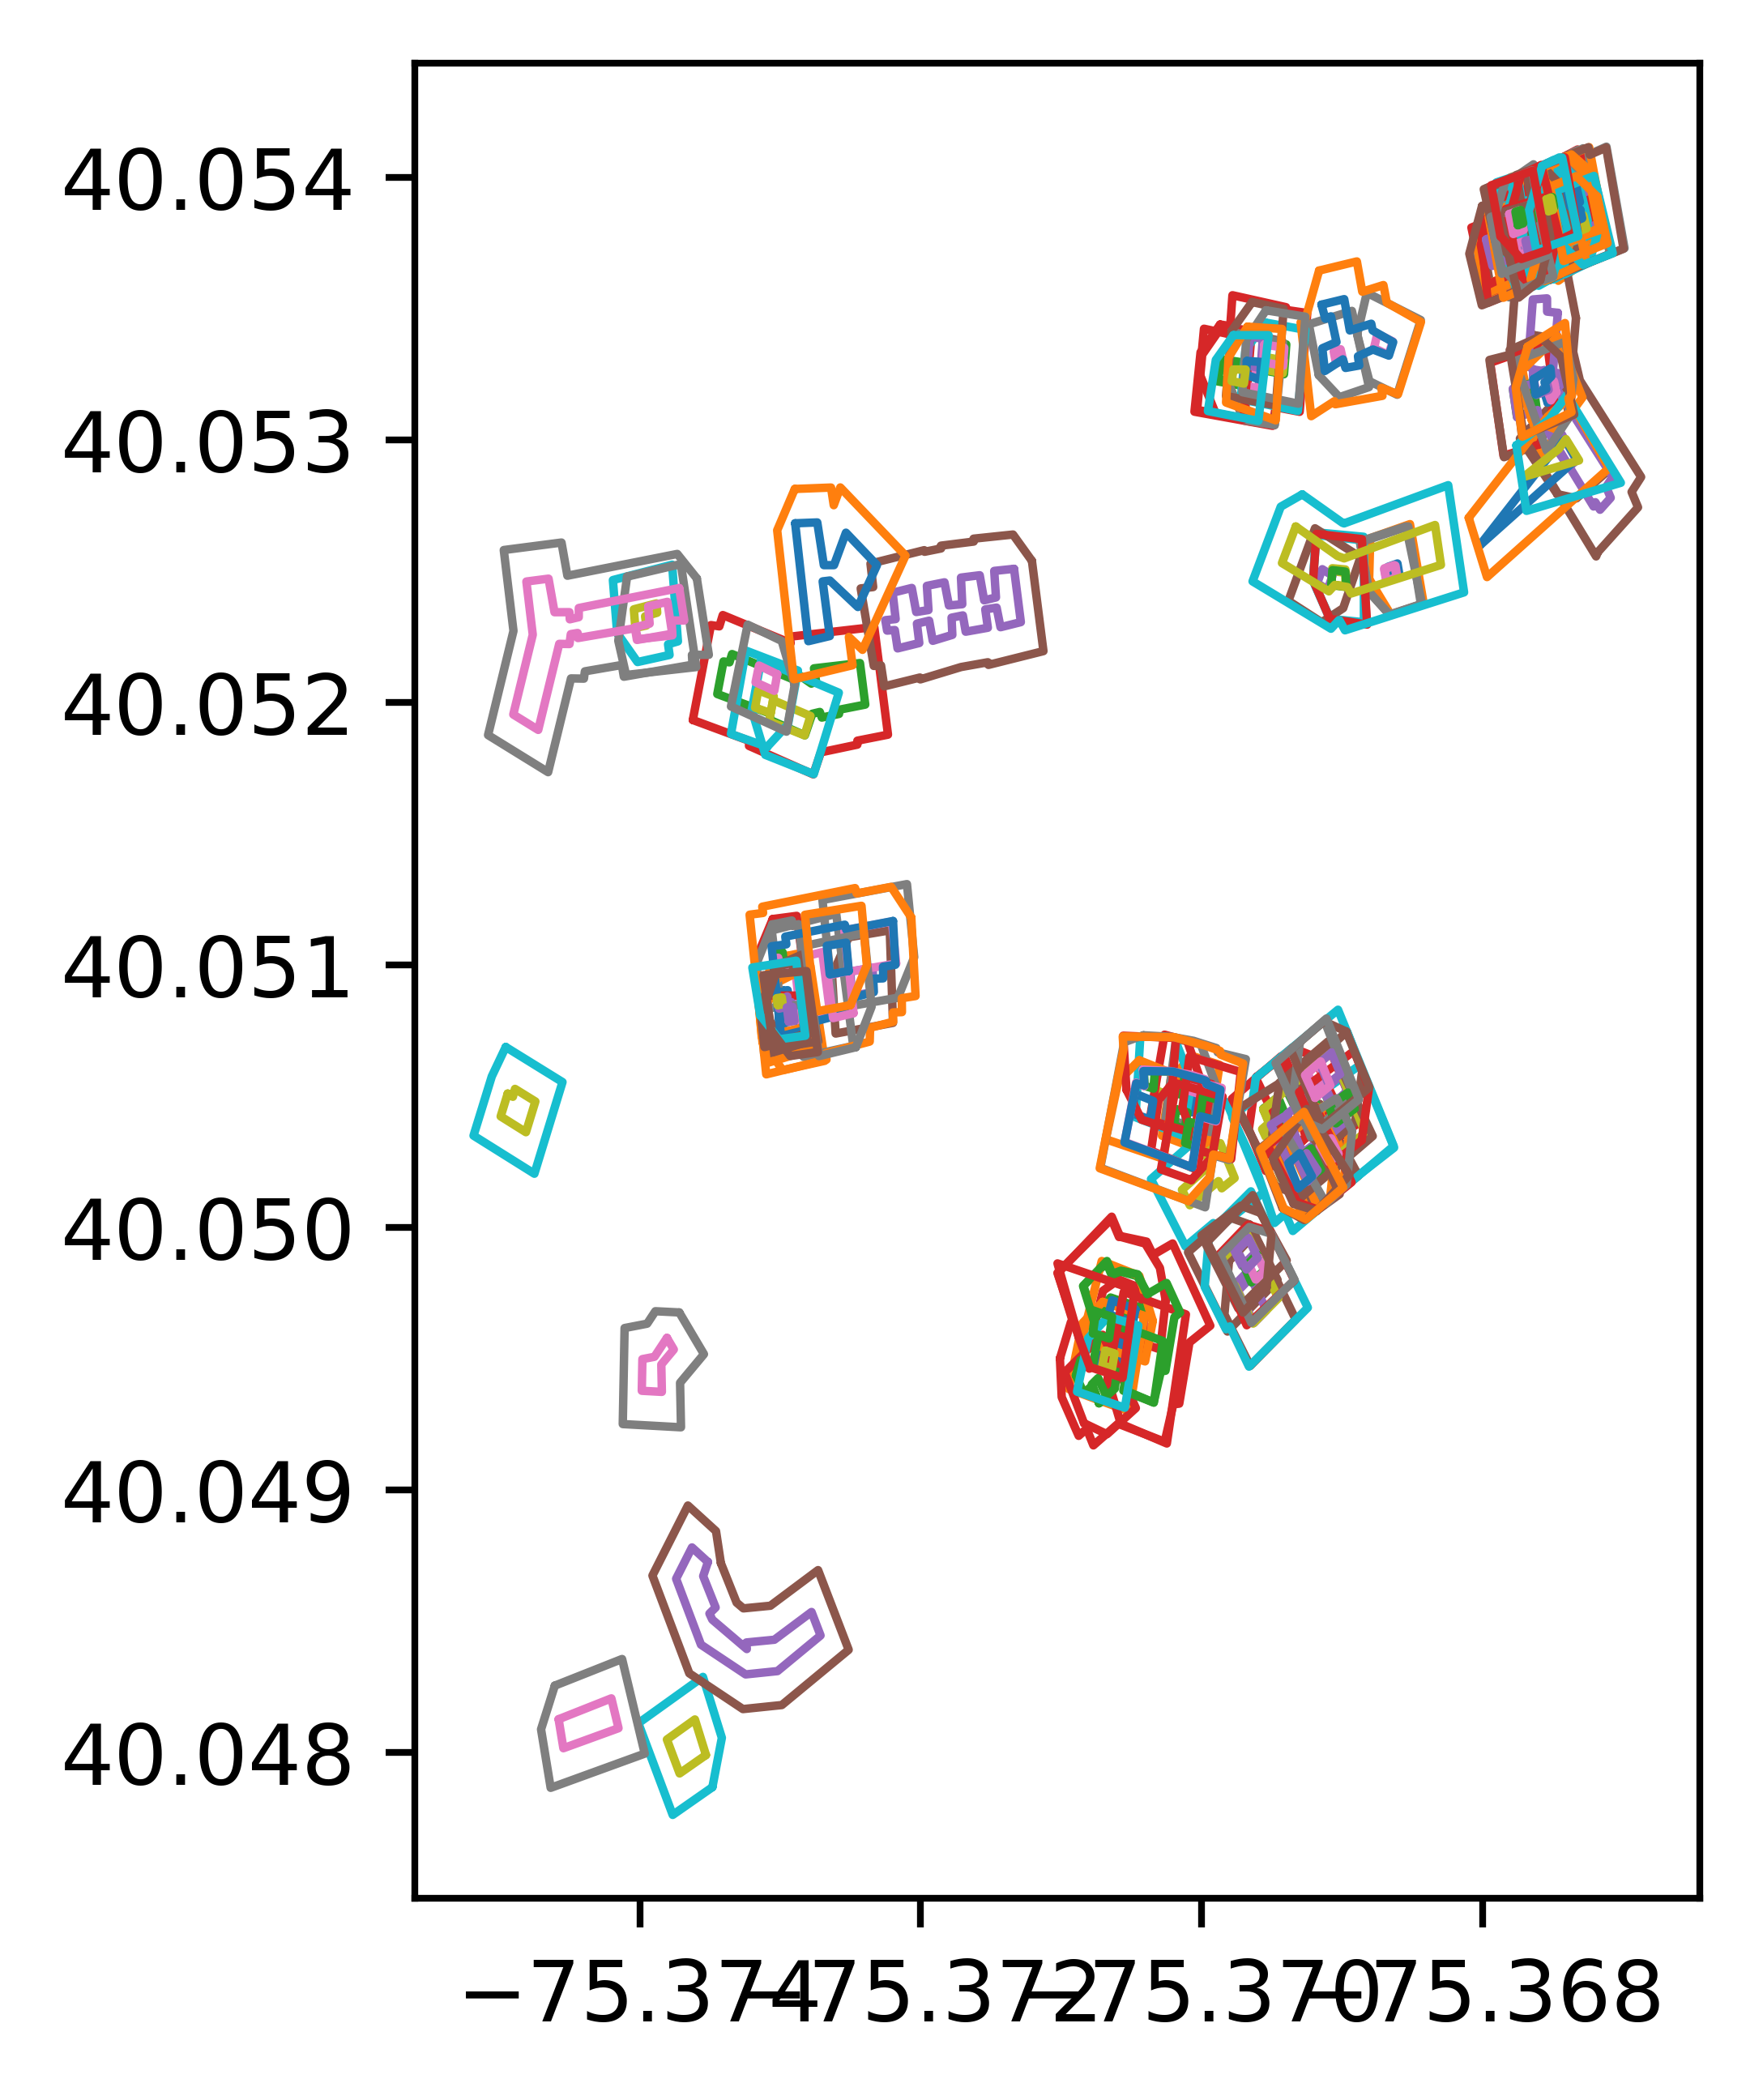

In [248]:
fig = pyplot.figure(1, dpi=750)
ax = fig.add_subplot(122)

for x in (range(0, len(zones['data']))):
#     print(zones['data'][x]['name'])
#     print(zones['data'][x]['geojson']['geometry']['coordinates'][0])
    coords = zones['data'][x]['geojson']['geometry']['coordinates'][0]
#     zones = list(map(int, zones))
#     print(len(coords), " Acutal # of Coords")
    expanded = coord_extend(coords, 40)
#     print(len(expanded), " # of EXPANDED Coords")
#     coords = LineString(coords)
    coords = LinearRing(coords)
    
#     expanded = LineString(expanded)
    expanded = LinearRing(expanded)
    
    plot_line(ax, coords)
    
    plot_line(ax, expanded)

